In [1]:
import pandas as pd
from string import punctuation
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import tokenization
import copy
import json
import sqlite3
from wordcloud import WordCloud
from token_db import *
pd.options.display.max_colwidth = 100

c:\users\song\pyvenvs\venv_twitter\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\song\pyvenvs\venv_twitter\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\song\pyvenvs\venv_twitter\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\song\pyvenvs\venv_twitter\lib\site-packages\tensorflow\python\frame

In [2]:
df = pd.read_csv('./data/new/new_all_nl.tsv', sep='\t', header=None, names=['labels','text'])

In [3]:
df.sample(5)

,labels,text
5059,41,Have you had any thoughts of suicide recently?
4658,260,Have you used a back brace before?
3620,29,are you healthy
722,43,what medications are you currently taking
3775,106,what other activities do you do


In [3]:
print(len(list(df.index)))

6827


In [4]:
def decapitalize(string_):
    return string_.lower()

In [5]:
df['text'] = df['text'].apply(decapitalize)

In [6]:
df.sample(5)

,labels,text
4336,51,would you be able to point to where exactly in the middle you feel the pain?
622,156,heart disease or cancer
2257,255,can you please state your full name and date of birth
3223,35,how is the health of your parents
5554,236,has it been pretty constant since?


In [7]:
def remove_punctuations(string_):
    return ''.join(c for c in string_ if c not in punctuation)

In [8]:
df['text'] = df['text'].apply(remove_punctuations)

In [9]:
df.sample(5)

,labels,text
2941,255,what is your name and date of birth
5334,270,tell me more about your back pain
4085,152,have you ever been hospitalized
4952,31,are you married
2131,326,what are your living arrangements like


In [10]:
def split_words(string_):
    return string_.split(' ')

In [11]:
df['split'] = df['text'].apply(split_words)

In [12]:
df.sample(5)

,labels,text,split
2135,204,what is your diet like,"[what, is, your, diet, like]"
3107,133,do you smoke,"[do, you, smoke]"
3994,10,okay is there anything else that is bothering you today,"[okay, is, there, anything, else, that, is, bothering, you, today]"
1459,252,oh that sounds quite bothersome lets see what we can do,"[oh, that, sounds, quite, bothersome, lets, see, what, we, can, do]"
5315,291,what do you do for fun,"[what, do, you, do, for, fun]"


In [13]:
num_class = len(set(df['labels'].data))
num_class

c:\users\song\pyvenvs\venv_twitter\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.data is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


334

In [12]:
def horizontal_line(y):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()
    l = mlines.Line2D([xmin,340],[y,y],color='r')
    ax.add_line(l)
    return l
def ranked_class_density(labels):
    num_class = len(set(labels.data))
    class_count = [0]*num_class
    for i in labels.data:
        class_count[i] +=1
    class_count_ = []
    for i in range(num_class):
        class_count_.append((i, class_count[i]))
    class_count_.sort(key=lambda x:x[1], reverse=True)
    classes = [i[0] for i in class_count_]
    counts = [i[1] for i in class_count_]
    median = np.median(counts)

    minority_classes = [i[0] for i in class_count_ if i[1]< median]
    print('median'+str(np.median(counts)))

    print(len(minority_classes))
    horizontal_line(median)
    plt.plot(counts)
    plt.ylabel('Frequency')
    plt.title('Ranked frequency of classes of VP16+17Strict')
    plt.show()
    return (median, minority_classes, counts)

median7.0
166


c:\users\song\pyvenvs\venv_twitter\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Series.data is deprecated and will be removed in a future version
  
c:\users\song\pyvenvs\venv_twitter\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Series.data is deprecated and will be removed in a future version
  # Remove the CWD from sys.path while we load stuff.


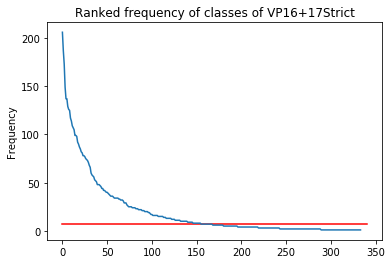

In [13]:
median, minority_classes, counts=ranked_class_density(df['labels'])

In [9]:
print(counts)
print(np.std(counts))

[206, 187, 173, 149, 137, 137, 129, 126, 125, 117, 114, 109, 107, 105, 99, 99, 98, 92, 90, 87, 85, 82, 81, 78, 78, 77, 75, 74, 73, 71, 68, 66, 60, 58, 57, 56, 53, 52, 51, 48, 48, 48, 47, 46, 44, 44, 42, 42, 41, 40, 40, 39, 38, 37, 36, 36, 36, 35, 34, 34, 34, 34, 34, 33, 33, 32, 32, 32, 31, 29, 29, 29, 27, 26, 25, 25, 25, 25, 24, 24, 24, 24, 23, 23, 23, 22, 22, 22, 22, 21, 21, 21, 20, 20, 20, 20, 19, 19, 18, 17, 17, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 14, 14, 14, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [17]:
# bert tokenizer
bert_tokenizor = tokenization.FullTokenizer('./data/bert_embeddings/vocab.txt')

In [18]:
text_series = copy.deepcopy(df['text'])
text_series = text_series.apply(bert_tokenizor.tokenize)
df['bert_token'] = text_series

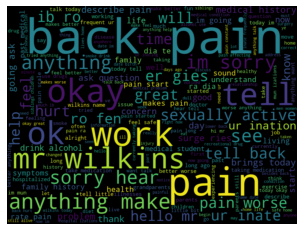

In [19]:
list_of_sentences = text_series.to_list()
allcorpus = ''
list_token = []
for sentence in list_of_sentences:
    for word in sentence:
        allcorpus += word+' '
        list_token.append(word)
wc = WordCloud(width=1024, height=768, margin=0).generate(allcorpus)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

In [20]:
print(len(list_token))
print(len(set(list_token)))

57495
2259


In [21]:
# set(list_token)

{'beverages',
 'valid',
 'intake',
 'agenda',
 'people',
 '##ici',
 'friend',
 'parents',
 'gone',
 'help',
 'university',
 'injuries',
 'sc',
 'romantic',
 'body',
 'there',
 'feels',
 'remained',
 'play',
 'illnesses',
 'learning',
 'clearly',
 'anymore',
 'classify',
 'locking',
 'background',
 'student',
 'medications',
 'er',
 'confidential',
 'ito',
 'been',
 'finding',
 'water',
 'details',
 'sexuality',
 'lifetime',
 'trust',
 '##air',
 'coarse',
 'alleviate',
 'plenty',
 'mei',
 'start',
 'concerned',
 'single',
 '##mes',
 '##lized',
 'mom',
 '##js',
 'intercourse',
 'concern',
 'aren',
 'operations',
 'difficulty',
 'shooting',
 '##lia',
 'glad',
 '##bling',
 'helpless',
 'grandparents',
 '##ase',
 '##tial',
 'overwhelmed',
 'employer',
 'huh',
 'cars',
 'schedule',
 '##work',
 'unfortunate',
 'swallowing',
 'infection',
 'injured',
 'promise',
 'be',
 'webber',
 '##ites',
 'dull',
 'education',
 'well',
 'dizzy',
 '##ors',
 'currently',
 'typically',
 '##pies',
 'remind',
 '

In [52]:
class TokenLevelCounter:
    """
    This class serves as a dictionary of all tokens, maintaining a count for each bert token in the corpus and their 
    corresponding embedding vector
    """
    def __init__(self, list_token):
        """
        Takes a list of tokenized corpus to build object
        :param list_token: list of bert token
        """
        keys = set(list_token)
        # we use a dictionary of token to store the information
        # the key of token_dict is the token it-self
        self.token_dict = {}
        
        # we use a dictionary to store the bert embedding for each layer of the same token
        # the key of layers dictionary is an integer ranging from -1 to -12, representing the index of the bert layer
        # each value of the dictionary item is a list, contains the embedding from this layer of the correspond token
        # among the entire corpus
        layers = {}
        for i in range(-1,-13,-1):
            layers[i] = []
        # in token_dict, each value is a tuple of 2, the first element is integer refering to the number of occurance 
        # of the key token; the second element is an layers dictionary containing the bert embeddings of the token
        for token in keys:
            self.token_dict[token] = [0, copy.deepcopy(layers)]
        for token in list_token:
            self.token_dict[token][0] += 1
        # add [CLS] token
        self.token_dict['[CLS]'] = [0, copy.deepcopy(layers)]
    def add_token(self, token):
        if token not in self.token_dict.keys():
            layers = {}
            for i in range(-1,-13,-1):
                layers[i] = []
            self.token_dict[token] = [0, layers]
    def plot_token_statistics(self, border_line='median'):
        items = list(self.token_dict.items())
        items.sort(key=lambda x:x[1][0], reverse=True)
        print(items)
        count = [i[1][0] for i in items]
        if border_line == 'median':
            border = np.median(count)
        elif border_line == 'mean':
            border = np.mean(count)
        elif isinstance(border_line, (int, float)):
            border = border_line
        else:
            border = 0
        horizontal_line(border)
        plt.plot(count)
        minority = [i for i in items if i[1][0]<border]
        return border, minority
    def load_bert_embedding_via_json(self, json_path='./data/bert_embeddings_json_new/train_feature.json'):
        with open(json_path) as file:
            line_count = 0
            for line in file.readlines():
                line_count += 1
                line_dict = json.loads(line)
                features = line_dict['features']
                for word_token in features:
                    for embedding_layer in word_token['layers']:
                        try:
                            self.token_dict[word_token['token']][1][embedding_layer['index']].append(embedding_layer['values'])
                        except KeyError:
                            self.add_token(word_token['token'])
                            self.token_dict[word_token['token']][1][embedding_layer['index']].append(embedding_layer['values'])
                        # print(self.token_dict[word_token['token']])
    @classmethod
    def from_kv_list(cls, kv_list):
        """
        return object from a list of key, value tuples
        :param kv_list: list of key, value tuples; key refers to token, 
        value refers to a list containing two element, as we have shown in the init function
        :return: a instance of TokenLevelCounter
        """
        result = cls(list_token=[])
        for key, value in kv_list:
            result.token_dict[key] = value
        return result

In [13]:
db = BERTDBProcessor()

In [14]:
db.create_dataset_table('vp16')
db.create_dataset_token_table('vp16', 'cls')
db.list_tables()

random_embed = np.random.rand(768)
db.insert_embedding(dataset_name='vp16', token_name='cls', layer=-1, embedding=random_embed, lineidx=1, positionidx=1)
list_of_embed = db.get_embeddings('vp16', 'cls')

[('table', 'BERT', 'BERT', 2, 'CREATE TABLE BERT (dataset TEXT PRIMARY KEY)'), ('table', 'vp16', 'vp16', 5, 'CREATE TABLE vp16 (token TEXT PRIMARY KEY, count INT)'), ('table', 'vp16_cls', 'vp16_cls', 7, 'CREATE TABLE vp16_cls (layer TEXT, embedding TEXT, lineidx INT, positionidx INT)')]


In [15]:
print(list_of_embed[0][0])

b'\x80\x02cnumpy.core.multiarray\n_reconstruct\nq\x00cnumpy\nndarray\nq\x01K\x00\x85q\x02c_codecs\nencode\nq\x03X\x01\x00\x00\x00bq\x04X\x06\x00\x00\x00latin1q\x05\x86q\x06Rq\x07\x87q\x08Rq\t(K\x01M\x00\x03\x85q\ncnumpy\ndtype\nq\x0bX\x02\x00\x00\x00f8q\x0cK\x00K\x01\x87q\rRq\x0e(K\x03X\x01\x00\x00\x00<q\x0fNNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq\x10b\x89h\x03X\xcc#\x00\x00\xc2\x9aD\xc2\x9e;5\xc3\x8d\xc3\xae?\xc3\x88\x7fX\xc3\x84\xc2\xad\xc3\xba\xc3\x8c?\x14Z\xc2\x8844t\xc3\x95?zL\xc2\xbeb\xc2\xafB\xc3\x9c?\xc2\xbc%\x1f\xc3\x8d\xc2\x80\xc2\xa8\xc3\x8f?f2\x0e\xc3\x82I\xc2\xb0\xc3\x95?\xc3\xa6\x0c\x11\xc3\xb6\xc3\xae(\xc3\x96?jr\x0c\xc2\x8a\xc3\x87"\xc3\xa1?\n\xc3\xae n\x14\xc2\x97\xc3\x98?T\xc2\x9c\xc2\x94\xc2\x9b\xc3\xaf\xc2\x9b\xc3\x9b?\xc3\xb0]\xc2\x9e\xc3\xabNX\xc3\xa5? (\xc3\x96\xc2\x9a\xc3\x8a\xc3\x9c\xc2\x90?\x1e{\xc2\xa0\'\xc2\xafS\xc3\xab?@\xc2\xacu\xc2\x8d\xc2\xad\xc3\xa6\xc3\x97?6\xc2\xb4y\xc3\xb4\xc3\x83\xc2\x99\xc3\x98?{\xc3\xb8:\x14\xc2\x85\xc2\xbf\xc3\xac?35*2>\x0f\x

In [16]:
reconstructed = np.loads(list_of_embed[0][0])
print(np.array_equal(random_embed, reconstructed))

True


c:\users\song\pyvenvs\venv_twitter\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: np.loads is deprecated, use pickle.loads instead
  """Entry point for launching an IPython kernel.


In [9]:
print(np.allclose(random_embed, reconstructed))

False


In [12]:
db.drop_tables()

In [6]:
            
            
tc = TokenLevelCounter(list_token)
median, minority = tc.plot_token_statistics('mean')
print(median)
print(len(minority))

NameError: name 'TokenLevelCounter' is not defined

In [ ]:
tc.load_bert_embedding_via_json('./data/bert_embeddings_json_new/train_feature.json')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [48]:
tc.token_dict['[CLS]']
print(len(tc.token_dict['[CLS]'][1][-1]))
print(len(tc.token_dict['[CLS]'][1][-2]))

2
2
